<a href="https://colab.research.google.com/github/Hachimocho/voice-replicator/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install deep_phonemizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for deep-phonemizer: filename=deep_phonemizer-0.0.17-py3-none-any.whl size=29727 sha256=23d884542fa81e2405ecccb0b95d4f2876b5cef8007d6fbe80ec9d586afb28d0
  Stored in directory: /root/.cache/pip/wheels/c0/09/57/64a017d46381d74a6b84869bbf763e3fe8579cc248ac65c651
Successfully built deep-phonemizer


In [ ]:

# Made by Bryce Gernon
# Runs pytorch example code to run voice generator


import sys
import torch
import torchaudio
import matplotlib.pyplot as plt


# Define hyperparams + initial vars

OUTPUT_DIR = "/content/sample_data"
torch.random.manual_seed(91817)
device = "cuda"
symbol_list = '_-!\'(),.:;? abcdefghijklmnopqrstuvwxyz'
look_up_tables = {s: i for i, s in enumerate(symbol_list)}  # Build lookup tables for TacoTron2
symbol_set = set(symbol_list)  # Build mathematical set out of symbols
source = torchaudio.pipelines.TACOTRON2_WAVERNN_PHONE_LJSPEECH
transforms = source.get_text_processor()  # Load symbol->tensor transforms for tacotron, phoneme-based encoding, waveRNN vocoder
spectrolizer = source.get_tacotron2().to(device)  # Load tensor->spectrogram tacotron model
waveformer = source.get_vocoder().to(device)  # Load spectrogram->waveform WaveRNN model

def text_to_sequence(text):
    text = text.lower()  # Convert to lowercase to match symbol set
    return [look_up_tables[s] for s in text if s in symbol_list]  # Converts text to symbols using lookup table

def text_to_spectrogram(text):
    proc, len = transforms(text)
    proc = proc.to(device)
    len = len.to(device)
    spc = spectrolizer.infer(proc, len) # returns spectrogram + unused data, seperate spectrogram
    return spc

def spectrogram_to_waveform(spectrogram):
    return waveformer(spectrogram[0], spectrogram[1])





  0%|          | 0.00/63.6M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/torchaudio/models/tacotron2_english_phonemes_1500_epochs_wavernn_ljspeech.pth" to /root/.cache/torch/hub/checkpoints/tacotron2_english_phonemes_1500_epochs_wavernn_ljspeech.pth


  0%|          | 0.00/107M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/torchaudio/models/wavernn_10k_epochs_8bits_ljspeech.pth" to /root/.cache/torch/hub/checkpoints/wavernn_10k_epochs_8bits_ljspeech.pth


  0%|          | 0.00/16.7M [00:00<?, ?B/s]

-4498407075755054703
(tensor([[81, 40, 79, 81, 55, 68, 11, 81, 40, 79, 81, 55, 68, 11, 54, 92, 20, 67,
         11, 81, 87, 11, 82, 78, 59]]), tensor([25], dtype=torch.int32))
['T', 'EH', 'S', 'T', 'IH', 'NG', ' ', 'T', 'EH', 'S', 'T', 'IH', 'NG', ' ', 'HH', 'W', 'AH', 'N', ' ', 'T', 'UW', ' ', 'TH', 'R', 'IY']


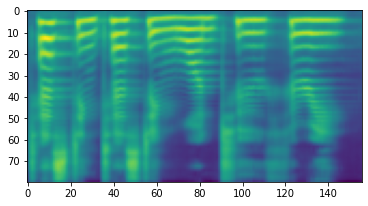

In [ ]:
test_text = "Testing Testing One Two Three"
code = hash(test_text)
print(code)
with torch.inference_mode():
  processed_text = transforms(test_text)
  processed, lengths = processed_text
  print(transforms(test_text))
  print([transforms.tokens[i] for i in processed[0, :lengths[0]]])
  spc = text_to_spectrogram(test_text)
  waveform = spectrogram_to_waveform(spc)
torchaudio.save(OUTPUT_DIR + "/" + str(code) + "_output_char_wavernn.wav", waveform[0][0:1].cpu(), sample_rate=waveformer.sample_rate)
plt.imshow(spc[0][0].cpu().detach())
plt.show()